In [33]:
#let's import all necessary libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#let's load the data into a dataframe
df=pd.read_csv('C:\\Users\\raymo\\Downloads\\Netflix Userbase.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [3]:
#let's see if there are any duplicate entries in our dataset
df.duplicated().any()

False

In [5]:
#let's have a glimpse of the dataset
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


Let's start the analysis by expounding on categorical data e.g., country_count

**CATEGORICAL_INSIGHTS**

In [35]:
#let's see which age group has the highest count in the dataset
#let's create age groups
bins = [18, 30,40, 50, 65, 100]  # Adjust these boundaries as needed
labels=['19-30','31-40','41-50','51-65','65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [6]:
#let's display age group counts
age_group_count=df['Age Group'].value_counts()
print(age_group_count)

31-40    1007
41-50     977
19-30     423
51-65      93
65+         0
Name: Age Group, dtype: int64


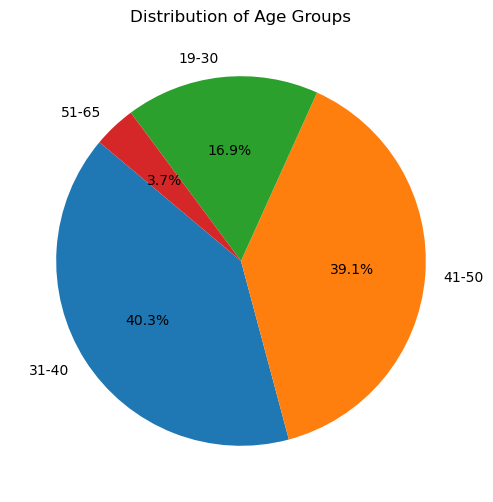

In [36]:
#let's visualize this
if '65+' in age_group_count:
    age_group_count = age_group_count.drop('65+')
plt.figure(figsize=(7, 6))
plt.pie(age_group_count, labels=age_group_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups')
plt.show()

Age group 31-40 has the highest count.We will find reasons for this later on.
Such insight is key to targeted advertising and movie production.

In [37]:
#which country has the highest count of subscribers in the dataset
df.drop(['User ID'],axis=1,inplace=True)

In [13]:
user_count_by_country=df.groupby('Country').size().reset_index(name='User_Count')
user_count_by_country

,Country,User_Count
0,Australia,183
1,Brazil,183
2,Canada,317
3,France,183
4,Germany,183
5,Italy,183
6,Mexico,183
7,Spain,451
8,United Kingdom,183
9,United States,451


(-1.0999997956840104,
 1.099995710410386,
 -1.0999997827376242,
 1.0999957911290286)

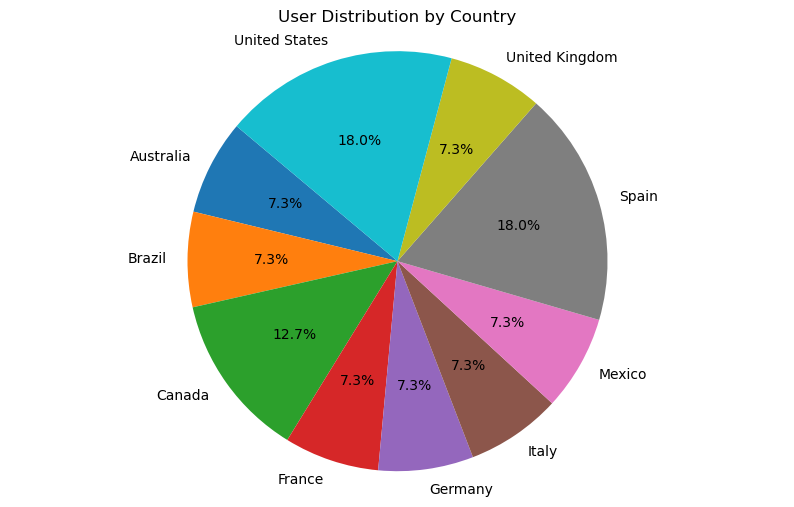

In [14]:
countries = user_count_by_country['Country']
user_counts = user_count_by_country['User_Count']
plt.figure(figsize=(10, 6))
plt.pie(user_counts, labels=countries, autopct='%1.1f%%', startangle=140)
plt.title('User Distribution by Country')
plt.axis('equal') 

In our dataset,The US and Spain have the highest count of netflix users.
An Insight for example, Netflix could credit Spain's high count to increased production of Spain culture films.


In [16]:
subscription_package_count=df.groupby('Subscription Type').size().reset_index(name='User_count')
subscription_package_count

,Subscription Type,User_count
0,Basic,999
1,Premium,733
2,Standard,768


(-1.0999995013288502,
 1.0999998950517063,
 -1.0999932443703173,
 1.099999293923532)

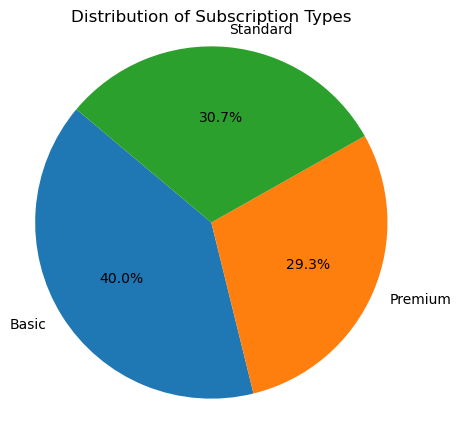

In [18]:
plt.figure(figsize=(5, 5))
plt.pie(subscription_package_count['User_count'], labels=subscription_package_count['Subscription Type'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subscription Types')
plt.axis('equal')

Basic package has the largest count of the subscription types

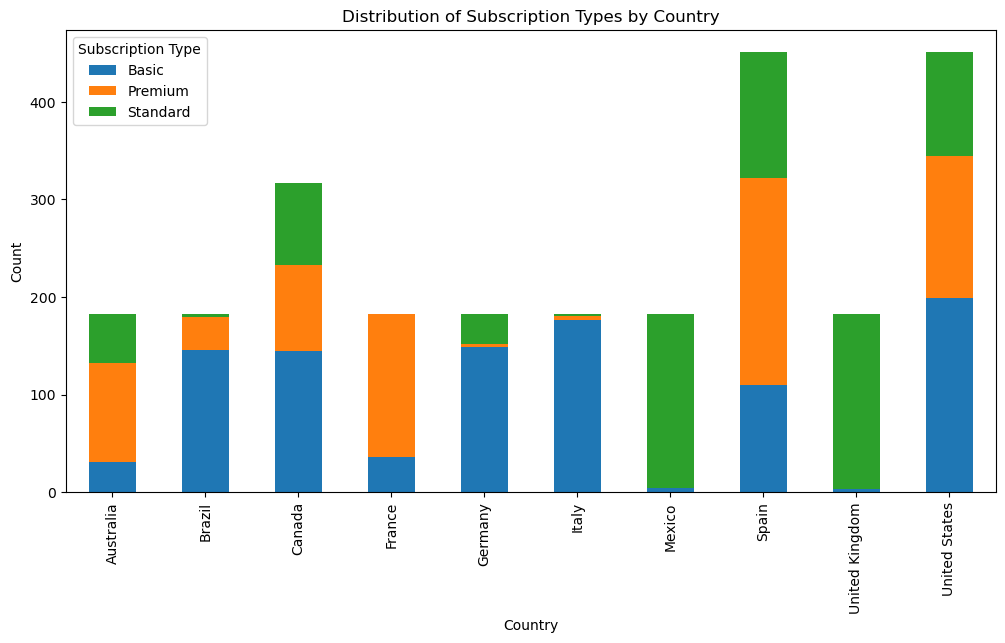

In [19]:
#Let's plot subscription type by country
#group the data by country,subscription type and count number of subscription type per country
subscription_counts_by_country = df.groupby(['Country', 'Subscription Type']).size().reset_index(name='Count')
#pivot the data to make subscription type as columns
pivot_data = subscription_counts_by_country.pivot(index='Country', columns='Subscription Type', values='Count')
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Subscription Types by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Subscription Type')

WOW!, from the bar chart we can deduct that
1. Spain has the highest count of premium subscriptions
2. There are no premium subscriptions in Mexico and UK
3. Almost all users in UK and Mexico have a standard subscription
4. There are no standard subscriptions in France
5. Most of Italy's users have a basic subscription

In [20]:
#below is the tabulated data of the insights above
subscription_counts_by_country = df.groupby(['Country', 'Subscription Type']).size().reset_index(name='Count')
subscription_counts_by_country

,Country,Subscription Type,Count
0,Australia,Basic,31
1,Australia,Premium,101
2,Australia,Standard,51
3,Brazil,Basic,146
4,Brazil,Premium,33
5,Brazil,Standard,4
6,Canada,Basic,145
7,Canada,Premium,88
8,Canada,Standard,84
9,France,Basic,36


In [21]:
#we want to see count of gender per subscription type
#insight will be helpful in targeted advertising
subscription_gender_counts = df.groupby(['Subscription Type', 'Gender']).size().reset_index(name='Count')
#pivot the data to be arranged as in rows= subscription_type and the columns to be gender.This will build clarity                                    
pivot_data = subscription_gender_counts.pivot(index='Subscription Type', columns='Gender', values='Count')
# Fill NaN values with 0 (if there are any)
pivot_data = pivot_data.fillna(0)
print(pivot_data)
                              

Gender             Female  Male
Subscription Type              
Basic                 512   487
Premium               364   369
Standard              381   387


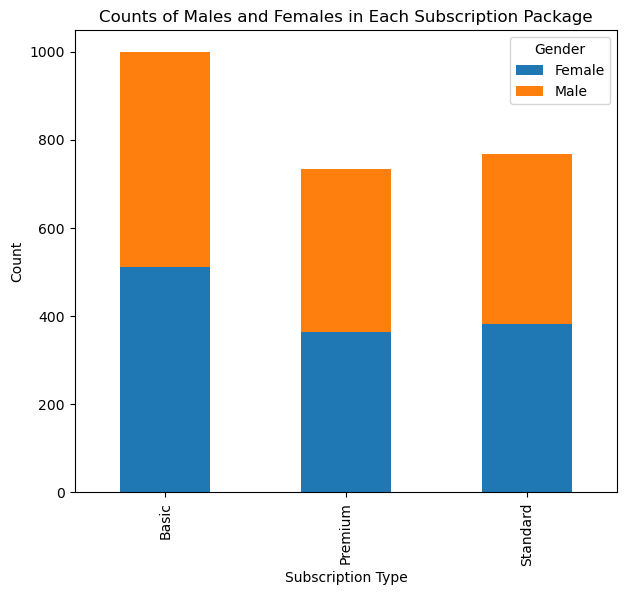

In [22]:
#let's plot this on a graph
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(7, 6))
plt.title('Counts of Males and Females in Each Subscription Package')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
#add legends for clarity
plt.legend(title='Gender', loc='upper right')

There are slightly more men in premium and standard packages than women, packages which cost a lot more than basic which has more women than men.

Netflix could find it useful to know count of gender per country.Say,if we found more women than men in Spain watched shows then Netflix could ramp up female relevant films to maximise on that.


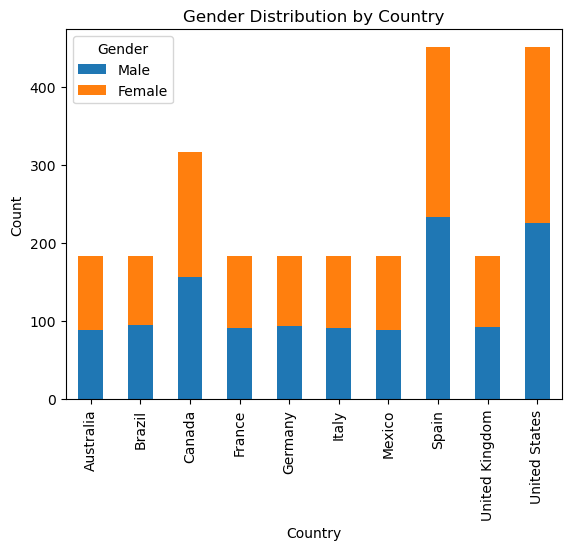

In [24]:
gender_country_counts = df.groupby(['Country', 'Gender']).size().reset_index(name='Count')
pivot_data = gender_country_counts.pivot(index='Country', columns='Gender', values='Count')
# Fill NaN values with 0 (if there are any)
pivot_data = pivot_data.fillna(0)
# Create a stacked bar plot
ax = pivot_data.plot(kind='bar', stacked=True)
# Set labels for the legend
ax.legend(title='Gender', labels=['Male', 'Female'])
# Add labels and a legend
plt.title('Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
# Show the plot
plt.show()

In [25]:
gender_country_counts

,Country,Gender,Count
0,Australia,Female,89
1,Australia,Male,94
2,Brazil,Female,95
3,Brazil,Male,88
4,Canada,Female,157
5,Canada,Male,160
6,France,Female,91
7,France,Male,92
8,Germany,Female,94
9,Germany,Male,89


In [26]:
#let's see how much each package generated in 2023
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])
#filter last_payment_date to entail 2023 only
revenues_2023=df[df['Last Payment Date'].dt.year==2023]
#group revenues by subscription type and sum monthly revenues
sum_revenue_2023 = revenues_2023.groupby('Subscription Type')['Monthly Revenue'].sum().reset_index()
sum_revenue_2023

,Subscription Type,Monthly Revenue
0,Basic,12469
1,Premium,9229
2,Standard,9573


In [68]:
#let's see what's the latest date we have in payments
df['Last Payment Date'].max()

Timestamp('2023-12-07 00:00:00')

(-1.0999994789469514,
 1.0999998761627143,
 -1.099993488708955,
 1.0999993415991227)

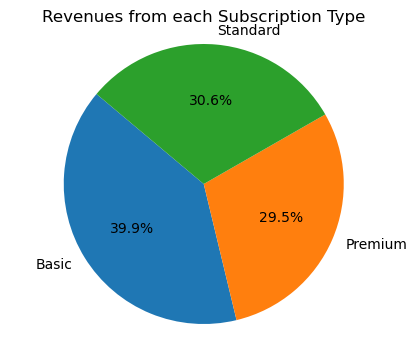

In [27]:
#plot the results on a pichart
plt.figure(figsize=(5, 4))
plt.pie(sum_revenue_2023['Monthly Revenue'], labels=subscription_package_count['Subscription Type'], autopct='%1.1f%%', startangle=140)
plt.title('Revenues from each Subscription Type')
plt.axis('equal')

Largest chunk of revenues was generated from Basic package.
It's safe to say most people prefer to subscribe to the most affordable option.

(-1.099999792455891,
 1.0999956448260824,
 -1.0999997771772092,
 1.099995664339181)

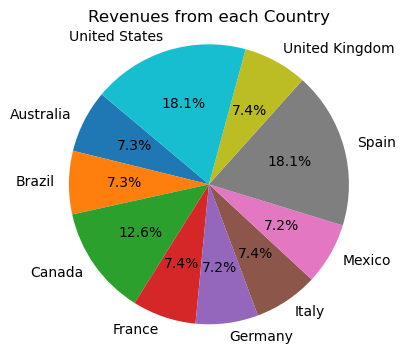

In [28]:
#Netflix may want to know how much was generated from each country
country_revenues=df.groupby('Country')['Monthly Revenue'].sum().reset_index()
plt.figure(figsize=(5, 4))
plt.pie(country_revenues['Monthly Revenue'], labels=country_revenues['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Revenues from each Country')
plt.axis('equal')

USA and Spain generated the most revenues whilst Germany and Mexico generated the least

In [18]:
#calculate how much was generated from each age group
revenues_by_age_group=df.groupby('Age Group')['Monthly Revenue'].sum().reset_index()
revenues_by_age_group

,Age Group,Monthly Revenue
0,19-30,5346
1,31-40,12543
2,41-50,12245
3,51-65,1137
4,65+,0


Age group 31-40 generated the most revenues followed by 41-50

In [29]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Age Group
0,Basic,10,15-01-22,2023-10-06,United States,28,Male,Smartphone,1 Month,19-30
1,Premium,15,05-09-21,2023-06-22,Canada,35,Female,Tablet,1 Month,31-40
2,Standard,12,28-02-23,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,41-50
3,Standard,12,10-07-22,2023-06-26,Australia,51,Female,Laptop,1 Month,51-65
4,Basic,10,01-05-23,2023-06-28,Germany,33,Male,Smartphone,1 Month,31-40


In [35]:
#let's see the devices share count and attempt to interpret insights
device_counts = df.groupby(['Device']).size().reset_index(name='Count')
device_counts

,Device,Count
0,Laptop,636
1,Smart TV,610
2,Smartphone,621
3,Tablet,633


(-1.0999997221597497,
 1.0999989006173996,
 -1.0999978083612263,
 1.0999997714352043)

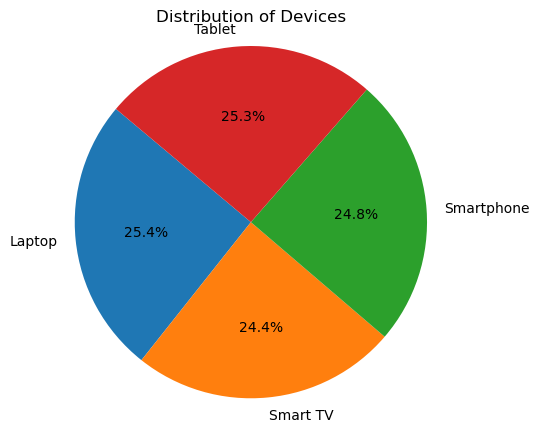

In [36]:
plt.figure(figsize=(5, 5))
plt.pie(device_counts['Count'], labels=device_counts['Device'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Devices')
plt.axis('equal')

Laptop's have the biggest count with Smart Tv having the lowest count

Laptop's and Tablets are mobile while Tv's aren't, thus we can attempt to deduct that: 

Many customers subscribe via the device that they will probably carry with them often

In [40]:
#let's see if there's a correlation between devices and packages
contingency_table = pd.crosstab(df['Subscription Type'], df['Device'])
print(contingency_table)


Device             Laptop  Smart TV  Smartphone  Tablet
Subscription Type                                      
Basic                 259       238         251     251
Premium               192       188         171     182
Standard              185       184         199     200


So for basic and premium packages, most people subscribed using their laptops while for standard most people used their tablets.
In premium, smartphones had the least count.
Tablets have a more diversified count across all pacakges.
Premium and standard users have more diversified distribution across all the devices.

In [41]:
#let's deduct if certain age groups prefer certain packages
afe_contigency_table=pd.crosstab(df['Age Group'],df['Subscription Type'])
print(afe_contigency_table)

Subscription Type  Basic  Premium  Standard
Age Group                                  
19-30                171      135       117
31-40                406      289       312
41-50                389      282       306
51-65                 33       27        33


The middle-aged group has the highest count across all the packages and all age groups mostly leant towards the basic package.

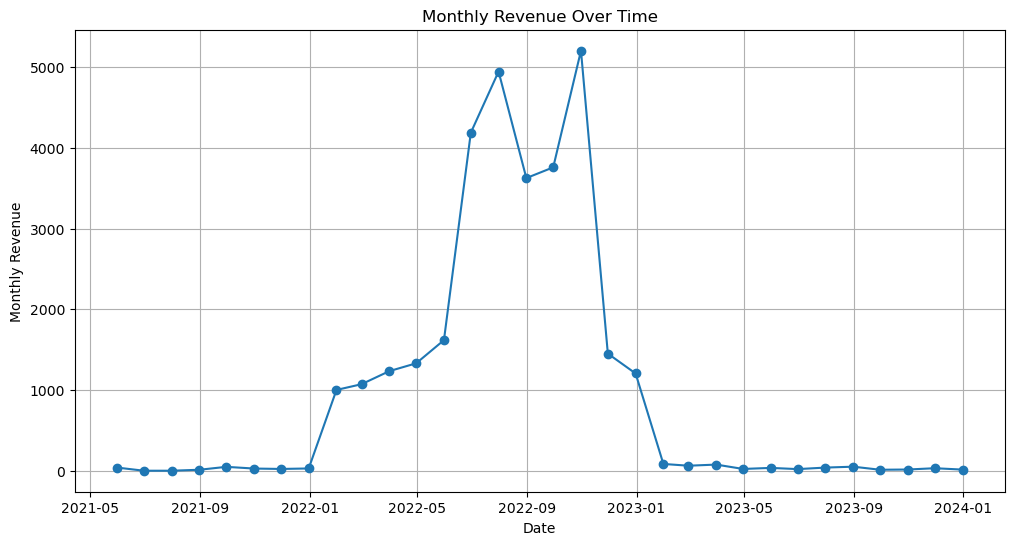

In [39]:
#let's perform a time-series analysis on Monthly reveue to deduct possible trends
#convert date columns to date time
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Set the date column as the index
df.set_index('Join Date', inplace=True)

# Resample the data to monthly frequency and sum the revenue for each month
monthly_revenue = df['Monthly Revenue'].resample('M').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.grid(True)
plt.show()

From 1st Jauary 2022 to September, revenues rose tremedously but sharply declined as well from November 2022 till date.

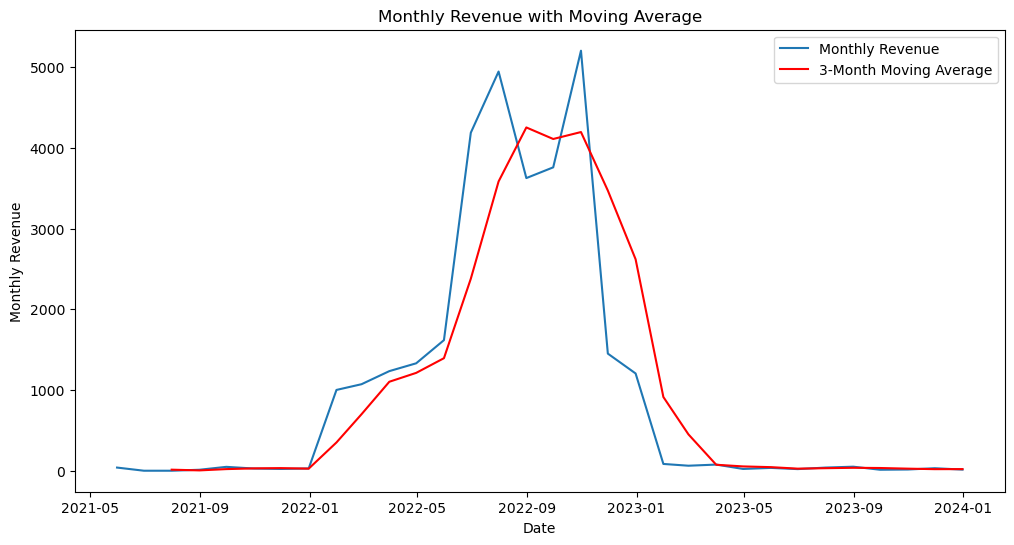

In [41]:
moving_average = monthly_revenue.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, label='Monthly Revenue')
plt.plot(moving_average.index, moving_average.values, label='3-Month Moving Average', color='red')
plt.title('Monthly Revenue with Moving Average')
plt.xlabel('Date')
plt.ylabel('Monthly Revenue')
plt.legend()
plt.show()

The moving average deducted from every 3 months indicates a downward trend of the monthly revenues generated.